#### Welcome to the coding portion of the SimOpt workshop!

In [1]:
# Some setup...

import os
os.chdir('../')  # Move one level up to import simopt

import sys
sys.path.append("venv\\lib\\site-packages")

In [2]:
# CODE CELL [0]

# Import experiment_base module, which contains functions for experimentation.
import simopt.experiment_base as expbase

# Import Example problem and Random Search and ADAM solvers.
from simopt.models.example import ExampleProblem
from simopt.solvers.randomsearch import RandomSearch
from simopt.solvers.adam import ADAM

In this portion of the workshop, we'll be working with a problem and two solvers.

**Problem:** Minimize $||x||^2$ with additive Gaussian noise over $x \in \mathbb{R}^2$.

**Solver:** Random Search
* Randomly samples solutions. For this two-dimensional problem, solutions are sampled from a MVN distribution with mean vector (0, 0) and variance-covariance matrix (1, 0; 0, 1).
* Takes a fixed number of observations (replications) at each solution.
* [Full documentation](https://simopt.readthedocs.io/en/latest/randomsearch.html)

**Solver:** ADAM
* A gradient-based search. Direct (IPA) gradient estimators are used, if available. Otherwise a finite differences estimator is used.
* Takes a fixed number of observations (replications) at each solution. This parameter is called `r`.
* [Full documentation](https://simopt.readthedocs.io/en/latest/adam.html).

In [8]:
# CODE CELL [1]

# Instantiate the problem and the Random Search solver, with specifications.
myproblem = ExampleProblem(fixed_factors={"initial_solution": (2.0, 2.0), "budget": 200})
myRSsolver = RandomSearch(fixed_factors={"crn_across_solns": False, "sample_size": 10})

# Pair the problem and solver for experimentation.
myexperiment = expbase.ProblemSolver(problem=myproblem, solver=myRSsolver)

Let's see how Random Search does on this toy problem.

Running macroreplication 1 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 2 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 3 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 4 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 5 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 6 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 7 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 8 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 9 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 10 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Postreplicating macroreplication 1 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Postreplicating macroreplication 2 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Postreplicating macroreplication 3 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Postreplicating macrorepli

['experiments/plots/SOLVER_SET_on_EXAMPLE-1_mean_prog_curve_unnorm.png']

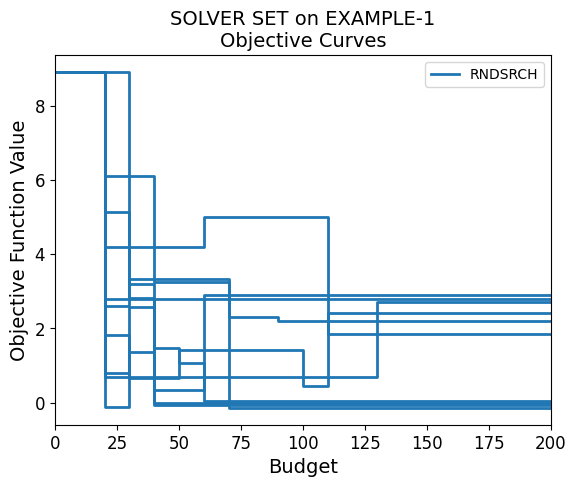

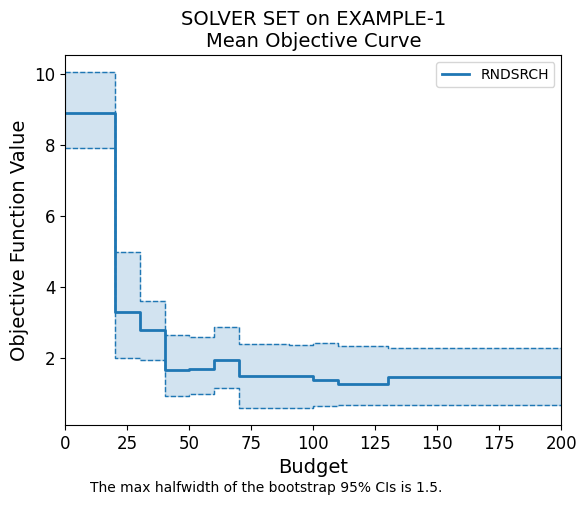

In [9]:
# CODE CELL [2]

# Run 10 macroreplications of Random Search on the Example Problem.
myexperiment.run(n_macroreps=10)

# Post-process the results.
myexperiment.post_replicate(n_postreps=200)
expbase.post_normalize(experiments=[myexperiment], n_postreps_init_opt=200)

# [Results are saved in a file called experiments/outputs/RNDSRCH_on_EXAMPLE-1.pickle.]
# [The file is not human-readable, so we'll skip looking at it.]

# Record a summary of the results in a human-readable way.
myexperiment.log_experiment_results()
# [Go check out the file called experiments/logs/RNDSRCH_on_EXAMPLE-1_experiment_results.txt.]

# Plot the (unnormalized) progress curves from the 10 macroreplications.
expbase.plot_progress_curves(experiments=[myexperiment], plot_type="all", normalize=False)
# Plot the (unnormalized) mean progress curve with bootstrapped CIs.
expbase.plot_progress_curves(experiments=[myexperiment], plot_type="mean", normalize=False)
# [The plots should be displayed in the output produced below.]

#### Your turn.

### Exercise \#1

In CODE CELL [1], play around with the arguments when initializing `myproblem` and `mysolver`.

Vary factors of the Example problem:
- Change the initial solution.
- Change the budget, i.e., the max number of replications. 

Vary factors of the Random Search solver:
- Change whether it uses CRN across solutions.
- Change the number of replications it takes at each solution.

Rerun CODE CELLS [1] and [2]. *What do you observe?*

#### Now let's work with the source code.

### Exercise \#2

1. Open the file simopt/model/example.py in the VS Code editor.
2. Let's change how random search randomly samples solutions in R^2. For starters, uncomment Line 355

    `x = tuple([rand_sol_rng.uniform(-2, 2) for _ in range(self.dim)])`

    and comment out Line 356
    
    `x = tuple(rand_sol_rng.mvnormalvariate(mean_vec=np.zeros(self.dim), cov=np.eye(self.dim), factorized=False))`

3. Restart the kernel using the Restart Button at the top of this notebook. This will ensure the new version of the source code is being imported.
4. Run COMBO CODE CELL [0 + 1 + 2] below (this effectively reruns CODE CELLS [0], [1], and [2]). *How have the plots changed?*

**Extra for Experts:** Come up with your own sampling distribution. Documentation on the types of distributions available can be found [here](https://mrg32k3a.readthedocs.io/en/latest/mrg32k3a.html).

Running macroreplication 1 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 2 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 3 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 4 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 5 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 6 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 7 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 8 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 9 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 10 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Postreplicating macroreplication 1 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Postreplicating macroreplication 2 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Postreplicating macroreplication 3 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Postreplicating macrorepli

['experiments/plots/SOLVER_SET_on_EXAMPLE-1_mean_prog_curve_unnorm.png']

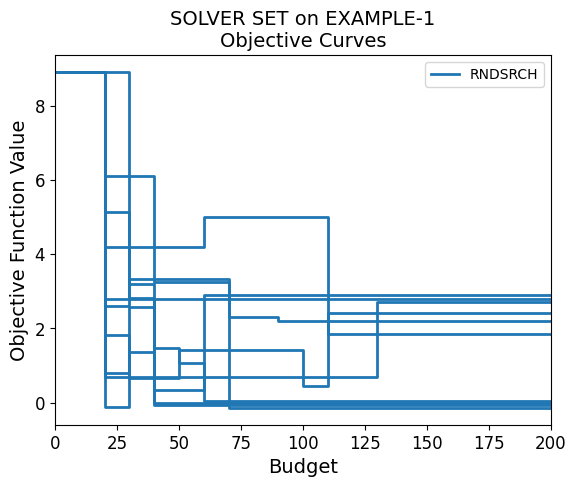

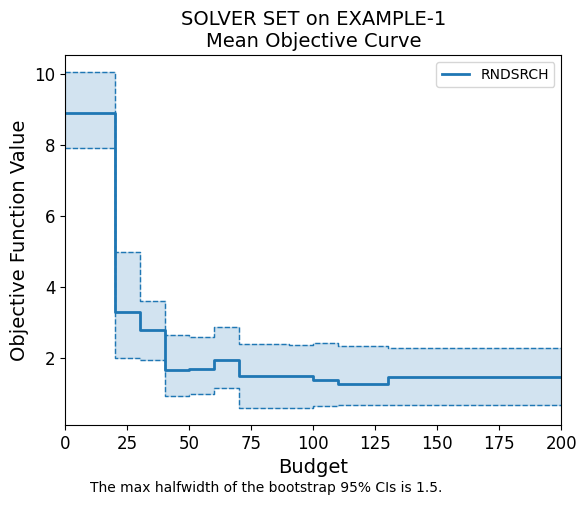

In [10]:
# COMBO CODE CELL [0 + 1 + 2]
import os
os.chdir('../')
import sys
sys.path.append("venv\\lib\\site-packages")
import simopt.experiment_base as expbase
from simopt.models.example import ExampleProblem
from simopt.solvers.randomsearch import RandomSearch
from simopt.solvers.adam import ADAM

myproblem = ExampleProblem(fixed_factors={"initial_solution": (2.0, 2.0), "budget": 200})
myRSsolver = RandomSearch(fixed_factors={"crn_across_solns": False, "sample_size": 10})
myexperiment = expbase.ProblemSolver(problem=myproblem, solver=myRSsolver)

myexperiment.run(n_macroreps=10)
myexperiment.post_replicate(n_postreps=200)
expbase.post_normalize(experiments=[myexperiment], n_postreps_init_opt=200)
myexperiment.log_experiment_results()
expbase.plot_progress_curves(experiments=[myexperiment], plot_type="all", normalize=False)
expbase.plot_progress_curves(experiments=[myexperiment], plot_type="mean", normalize=False)

#### Now let's bring the ADAM solver into the mix.

Running 10 macro-replications of RNDSRCH on EXAMPLE-1.
Running macroreplication 1 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 2 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 3 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 4 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 5 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 6 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 7 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 8 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 9 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 10 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running 10 macro-replications of ADAM on EXAMPLE-1.
Running macroreplication 1 of 10 of Solver ADAM on Problem EXAMPLE-1.
Running macroreplication 2 of 10 of Solver ADAM on Problem EXAMPLE-1.
Running macroreplicati

['experiments/plots/SOLVER_SET_on_EXAMPLE-1_mean_prog_curve_unnorm.png']

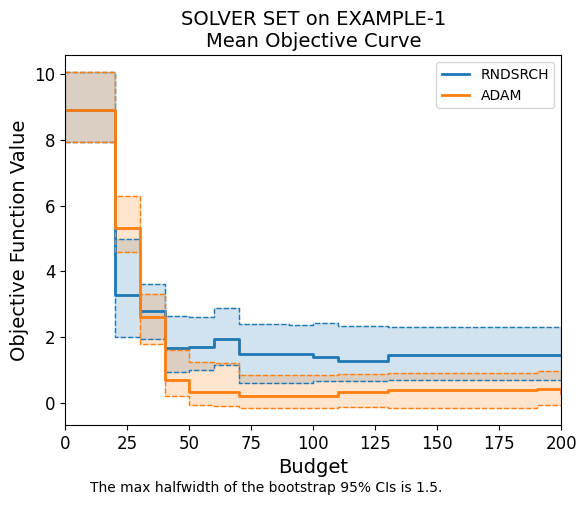

In [11]:
# CODE CELL [3]

myADAMsolver = ADAM(fixed_factors={"crn_across_solns": False, "r": 10})
# Create a grouping of Example-RandomSearch and Example-ADAM pairs.
mygroupexperiment = expbase.ProblemsSolvers(problems=[myproblem], solvers=[myRSsolver, myADAMsolver])

# Run 10 macroreplications of each pair and post-process.
mygroupexperiment.run(n_macroreps=10)
mygroupexperiment.post_replicate(n_postreps=200)
mygroupexperiment.post_normalize(n_postreps_init_opt=200)

# Record a summary of the results in a human-readable way.
mygroupexperiment.log_group_experiment_results()
# [Go check out the file called experiments/logs/group_RNDSRCH_ADAM_on_EXAMPLE-1_group_experiment_results.txt.]

# Plot the mean progress curve for each solver from the 10 macroreplications.
expbase.plot_progress_curves(experiments=[mygroupexperiment.experiments[0][0], mygroupexperiment.experiments[1][0]], plot_type="mean", normalize=False)
# [The plot should be displayed in the output produced below.]


#### Your turn.

### Exercise \#3

1. Open simopt/model/example.py again.
2. Change the noise in the objective function evaluations to create a slightly different 2D optimization problem. This can be done by changing Line 85: 
    
    `fn_eval_at_x = np.linalg.norm(x) ** 2 + noise_rng.normalvariate()`

    where `x` is a numpy array of length two. For starters, try passing the argument `sigma=10` into the function call `noise_rng.normalvariate()`. The default value is `sigma=1`, so this has the effect of increasing the common variance of the noise from 1 to 100.
3. Restart the kernel and run COMBO CODE CELL [0 + 1 + 3] below. *How have the plots changed? Why haven't they changed more?*

4. Next, change the underlying objective function by replacing `np.linalg.norm(x) ** 2` in Line 85 with some other two-dimensional function of `x`, e.g., `1 - np.exp(-np.linalg.norm(x) ** 2)`. (This objective function looks like an upside-down standard bivariate normal pdf, rescaled.)
5. Depending of your choice of new objective function, you MAY need to change other parts of the code, including:
    * The gradient of `f(x)` in Line 89. For the example given above, this would need to be changed from
    
        `gradients = {"est_f(x)": {"x": tuple(2 * x)}}`

        to

        `gradients = {"est_f(x)": {"x": tuple(2 * x * np.exp(-np.linalg.norm(x) ** 2))}}`
    * If you change the problem to a maxmization problem, you will need to change Line 173 from
    
        `self.minmax = (-1,)`
        
        to
        
        `self.minmax = (1,)`.
    * The optimal solution in Line 204. (For the running example, this will not be necessary.)
    * The optimal objective function value in Line 203. (For the running example, this will not be necessary.)
6. Restart the kernel and run COMBO CODE CELL [0 + 1 + 3] below. *How have the plots changed?*

**Extra for Experts:** Change the dimension of the problem. To do this, you will need to change the dimension of the default initial solution, defined in Line 185.

Running 10 macro-replications of RNDSRCH on EXAMPLE-1.
Running macroreplication 1 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 2 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 3 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 4 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 5 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 6 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 7 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 8 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 9 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running macroreplication 10 of 10 of Solver RNDSRCH on Problem EXAMPLE-1.
Running 10 macro-replications of ADAM on EXAMPLE-1.
Running macroreplication 1 of 10 of Solver ADAM on Problem EXAMPLE-1.
Running macroreplication 2 of 10 of Solver ADAM on Problem EXAMPLE-1.
Running macroreplicati

['experiments/plots/SOLVER_SET_on_EXAMPLE-1_mean_prog_curve_unnorm.png']

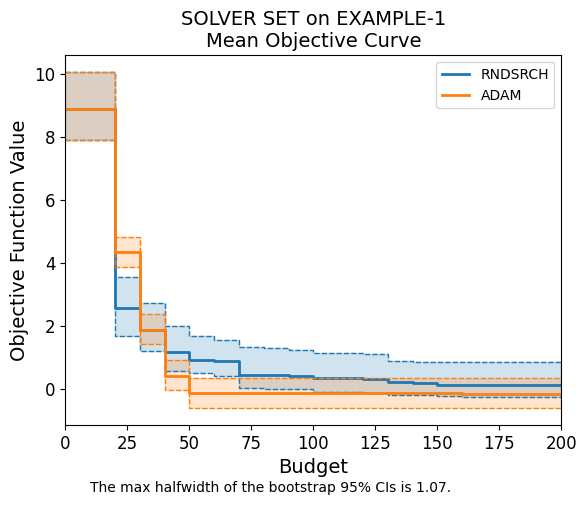

In [7]:
# COMBO CODE CELL [0 + 1 + 3]
import os
os.chdir('../')
import sys
sys.path.append("venv\\lib\\site-packages")
import simopt.experiment_base as expbase
from simopt.models.example import ExampleProblem
from simopt.solvers.randomsearch import RandomSearch
from simopt.solvers.adam import ADAM

myproblem = ExampleProblem(fixed_factors={"initial_solution": (2.0, 2.0), "budget": 200})
myRSsolver = RandomSearch(fixed_factors={"crn_across_solns": True, "sample_size": 10})
myADAMsolver = ADAM(fixed_factors={"crn_across_solns": True, "r": 10})

mygroupexperiment = expbase.ProblemsSolvers(problems=[myproblem], solvers=[myRSsolver, myADAMsolver])
mygroupexperiment.run(n_macroreps=10)
mygroupexperiment.post_replicate(n_postreps=200)
mygroupexperiment.post_normalize(n_postreps_init_opt=200)
mygroupexperiment.log_group_experiment_results()
expbase.plot_progress_curves(experiments=[mygroupexperiment.experiments[0][0], mygroupexperiment.experiments[1][0]], plot_type="mean", normalize=False)

#### Other demonstrations, time permitting
* Walkthrough `replicate()` method of simopt/models/ironore.py to illustrate what the code looks like for a typical stochastic simulation model.
* Walkthrough `solve()` method of simopt/solvers/ADAM.py to illustrate what the code looks like for a typical solver.